In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from __future__ import print_function

In [3]:
# Make plots prettyful
pl.style.use('fivethirtyeight')

In [20]:
data = pd.read_csv('hw_2_stops.csv', dtype={'precinct': str, 'time.period': str})

In [5]:
data.columns

Index([u'suspected.crime', u'found.weapon', u'found.gun', u'arrested',
       u'frisked', u'searched', u'summons.issued', u'found.contraband',
       u'force.hands', u'force.wall', u'force.ground', u'force.drawn',
       u'force.pointed', u'force.baton', u'force.handcuffs', u'force.pepper',
       u'force.other', u'suspect.race', u'suspect.age', u'suspect.build',
       u'suspect.sex', u'suspect.height', u'suspect.weight',
       u'stopped.bc.desc', u'stopped.bc.violent', u'stopped.bc.other',
       u'stopped.bc.object', u'stopped.bc.casing', u'stopped.bc.lookout',
       u'stopped.bc.drugs', u'stopped.bc.clothing', u'stopped.bc.furtive',
       u'stopped.bc.bulge', u'precinct', u'inside.outside',
       u'location.housing', u'observation.period', u'officer.uniform',
       u'additional.report', u'additional.investigation',
       u'additional.proximity', u'additional.evasive',
       u'additional.associating', u'additional.direction',
       u'additional.highcrime', u'additional.time'

In [21]:
data = data.dropna()#[data['date'].str.contains('2011')]

In [28]:
subset = data.sample(50000)
print(subset.shape)

(50000, 55)


In [85]:
target = subset['arrested']

In [30]:
X = subset[[c for c in subset.columns if 'found' not in c and 'force' not in c and 'additional' not in c and c not in ['arrested', 'frisked', 'searched', 'date', 'summons.issued']]]

In [86]:
target.sum()

2979

In [32]:
X = pd.get_dummies(X)

In [90]:
X_train, X_test, target_train, target_test = train_test_split(
    X, target, test_size=0.25, random_state=1
)

In [91]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=200)
clf = clf.fit(X_train, target_train)

In [92]:
pred = clf.predict(X_train)
print("Classification accuracy for train set =", 1.0*sum(target_train==pred)/len(pred))

pred = clf.predict(X_test)
print("Classification accuracy for test set =", 1.0*sum(target_test==pred)/len(pred))

Classification accuracy for train set = 0.999973333333
Classification accuracy for test set = 0.94664


In [93]:
print("Test true precision", 1.*sum(target_test&pred)/sum(pred))
print("Test true recall", 1.*sum(target_test&pred)/sum(target_test))

print("Test false precision", 1.*sum((~target_test)&(~pred))/sum(~pred))
print("Test false recall", 1.*sum((~target_test)&(~pred))/sum(~target_test))

Test true precision 1.0
Test true recall 0.0133136094675
Test false precision 0.946601553118
Test false recall 1.0


In [94]:
# Most important features
X.columns[np.argsort(clf.feature_importances_)[::-1]]

Index([u'lon', u'lat', u'suspect.age', u'suspect.weight', u'suspect.height',
       u'observation.period', u'officer.uniform', u'stopped.bc.furtive',
       u'suspect.build_medium', u'suspect.race_black', 
       ...
       u'suspected.crime_unlawfully dealing with a child',
       u'suspected.crime_unlawfull imprisonment', u'suspected.crime_bigamy',
       u'suspected.crime_unlawful use of credit card, debit card',
       u'suspected.crime_unlawful possession of radio devices',
       u'suspected.crime_substitution of children', u'suspected.crime_sodomy',
       u'suspected.crime_forgery of a vin',
       u'suspected.crime_killing or injuring a poilce animal',
       u'suspected.crime_unauthorized recording'],
      dtype='object', length=212)

In [95]:
prob = clf.predict_proba(X_test)

In [96]:
prob.sum(axis=0)

array([ 11755.36883333,    744.63116667])

['suspect.race_asian', 'suspect.race_black', 'suspect.race_hispanic', 'suspect.race_native.american', 'suspect.race_other', 'suspect.race_white']
['precinct_1', 'precinct_10', 'precinct_100', 'precinct_101', 'precinct_102', 'precinct_103', 'precinct_104', 'precinct_105', 'precinct_106', 'precinct_107', 'precinct_108', 'precinct_109', 'precinct_110', 'precinct_111', 'precinct_112', 'precinct_113', 'precinct_114', 'precinct_115', 'precinct_120', 'precinct_122', 'precinct_123', 'precinct_13', 'precinct_14', 'precinct_17', 'precinct_18', 'precinct_19', 'precinct_20', 'precinct_22', 'precinct_23', 'precinct_24', 'precinct_25', 'precinct_26', 'precinct_28', 'precinct_30', 'precinct_32', 'precinct_33', 'precinct_34', 'precinct_40', 'precinct_41', 'precinct_42', 'precinct_43', 'precinct_44', 'precinct_45', 'precinct_46', 'precinct_47', 'precinct_48', 'precinct_49', 'precinct_5', 'precinct_50', 'precinct_52', 'precinct_6', 'precinct_60', 'precinct_61', 'precinct_62', 'precinct_63', 'precinct_66

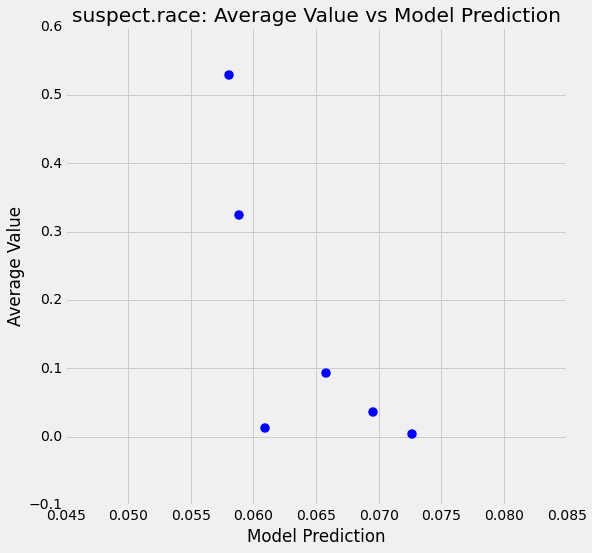

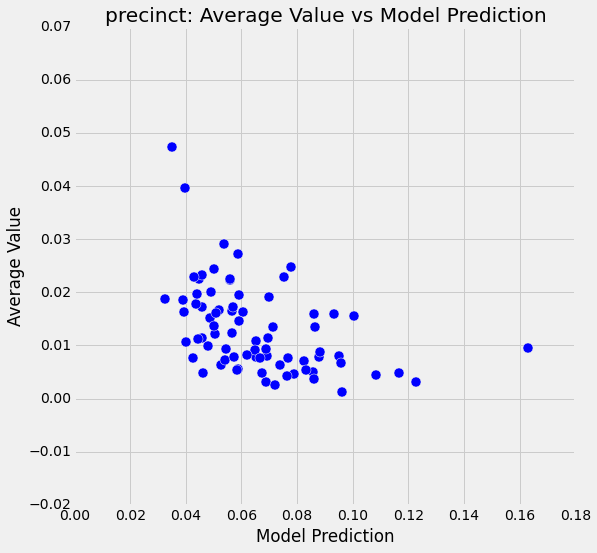

In [99]:
for cat in ['suspect.race', 'precinct']:    
    cols = [c for c in X.columns if cat in c]
    print(cols)
    points = []
    for c in cols:
        points.append([prob[np.where(X_test[c] == 1)].mean(axis=0)[1], X[c].mean()])
    points = np.array(points)    
    figure, ax = pl.subplots(figsize=(8,8))
    ax.scatter(points[:,0], points[:,1], s=100)
    ax.set_xlabel('Model Prediction')
    ax.set_ylabel('Average Value')
    ax.set_title('%s: Average Value vs Model Prediction' % cat)
#ax.set_aspect('equal')
#ax.set_aspect(1./ax.get_data_ratio())
#ax.set_xlim(ax.get_ylim())

In [67]:
points[:,0]

array([ 0.00908235,  0.01073514,  0.01187913,  0.00836735,  0.01152439,
        0.01883929])

In [51]:
subset[subset['suspect.race'] == 'black']

,suspected.crime,found.weapon,found.gun,arrested,frisked,searched,summons.issued,found.contraband,force.hands,force.wall,...,additional.time,additional.sights,additional.other,radio.run,day,month,time.period,date,lat,lon
1210081,criminal possession of marihuana,False,False,False,False,False,False,False,False,False,...,True,False,False,True,Friday,October,6,2012-10-19,40.623907,-74.081741
128016,cpw,False,False,False,True,False,False,False,False,False,...,True,False,False,False,Saturday,March,1,2011-03-05,40.601731,-73.749050
1063017,grand larceny auto,False,False,False,False,False,True,False,False,False,...,True,False,False,False,Friday,August,6,2012-08-10,40.815688,-73.958291
606261,robbery,False,False,False,True,False,False,False,False,False,...,False,False,False,False,Thursday,November,3,2011-11-17,40.818560,-73.927313
709284,cpw,False,False,False,True,False,False,False,False,False,...,True,False,False,False,Friday,January,5,2012-01-13,40.704721,-73.940280
144453,criminal trespass,False,False,False,False,False,False,False,False,False,...,False,False,False,False,Saturday,March,6,2011-03-12,40.592559,-73.981521
899611,robbery,False,False,False,False,False,False,False,False,False,...,False,True,False,False,Thursday,June,5,2012-06-07,40.788996,-73.946557
902113,robbery,False,False,False,True,False,False,False,False,False,...,True,False,False,True,Monday,April,5,2012-04-30,40.805064,-73.941165
265647,robbery,False,False,False,False,False,False,False,False,False,...,True,False,False,False,Wednesday,May,6,2011-05-11,40.666871,-73.908132
232338,robbery,False,False,False,True,False,False,False,False,False,...,True,False,False,False,Monday,April,5,2011-04-25,40.682749,-73.875361


In [113]:
target_test[X_test[cols[1]] == 1].head(10)

826485     False
225511      True
75099      False
549484     False
300111     False
1183957    False
521475     False
181606     False
566323     False
263324     False
Name: found.weapon, dtype: bool

In [116]:
pred[X_test[cols[1]] == 1][:10]

c:\Users\docmario\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


array([False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [118]:
pred.sum()

588

In [121]:
target_train.sum()

9976

In [38]:
#X.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
X.dropna(axis=0)

,summons.issued,suspect.age,suspect.height,suspect.weight,stopped.bc.desc,stopped.bc.violent,stopped.bc.other,stopped.bc.object,stopped.bc.casing,stopped.bc.lookout,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,False,21,5.666667,182.0,False,False,False,False,True,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,15,5.500000,140.0,False,False,False,False,True,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,17,5.583333,130.0,False,False,True,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,17,5.583333,130.0,False,False,True,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,20,6.250000,185.0,False,False,True,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,False,17,5.500000,150.0,False,False,True,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,False,16,5.333333,140.0,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,False,19,5.833333,150.0,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,False,35,6.000000,200.0,False,False,True,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,False,20,5.666667,160.0,False,True,False,False,True,True,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
col = X.dropna(axis=1).columns

In [46]:
for c in X.columns:
    if c not in col:
        print(c)

suspect.weight
lat
lon
